In [ ]:
import os
import warnings
import itertools
import subprocess
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
#Importation des données à partir du fichier CSV
drought_df = pd.read_csv('drought_data_v1.csv')

In [ ]:

#Affichage des 5 premières lignes du DataFrame
drought_df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1
1,1001,2000-01-11,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,...,10.43,1.76,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2
2,1001,2000-01-18,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,...,14.19,2.63,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2
3,1001,2000-01-25,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,...,-0.61,3.35,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2
4,1001,2000-02-01,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,...,1.88,2.03,2.74,0.88,1.86,4.18,6.38,1.27,5.11,1


In [ ]:
#Affichage du nombre de valeurs manquantes (NaN) pour chaque colonne du DataFrame
drought_df.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [ ]:
#Affiche un résumé des informations du DataFrame, y compris  Le nombre de lignes et de colonnes ,les types de données pour chaque colonne , le nombre de valeurs non nulles pour chaque colonne...
drought_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460760 entries, 0 to 1460759
Data columns (total 21 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   fips         1460760 non-null  int64  
 1   date         1460760 non-null  object 
 2   PRECTOT      1460760 non-null  float64
 3   PS           1460760 non-null  float64
 4   QV2M         1460760 non-null  float64
 5   T2M          1460760 non-null  float64
 6   T2MDEW       1460760 non-null  float64
 7   T2MWET       1460760 non-null  float64
 8   T2M_MAX      1460760 non-null  float64
 9   T2M_MIN      1460760 non-null  float64
 10  T2M_RANGE    1460760 non-null  float64
 11  TS           1460760 non-null  float64
 12  WS10M        1460760 non-null  float64
 13  WS10M_MAX    1460760 non-null  float64
 14  WS10M_MIN    1460760 non-null  float64
 15  WS10M_RANGE  1460760 non-null  float64
 16  WS50M        1460760 non-null  float64
 17  WS50M_MAX    1460760 non-null  float64
 18  WS

In [ ]:
drought_df.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score            int64
dtype: object

In [ ]:
# Extrait l'année, le mois et le jour de la colonne 'date' et les stocke dans de nouvelles colonnes 'year', 'month' et 'day'
drought_df['year'] = pd.DatetimeIndex(drought_df['date']).year
drought_df['month'] = pd.DatetimeIndex(drought_df['date']).month
drought_df['day'] = pd.DatetimeIndex(drought_df['date']).day
drought_df.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score            int64
year             int32
month            int32
day              int32
dtype: object

<Axes: xlabel='score'>

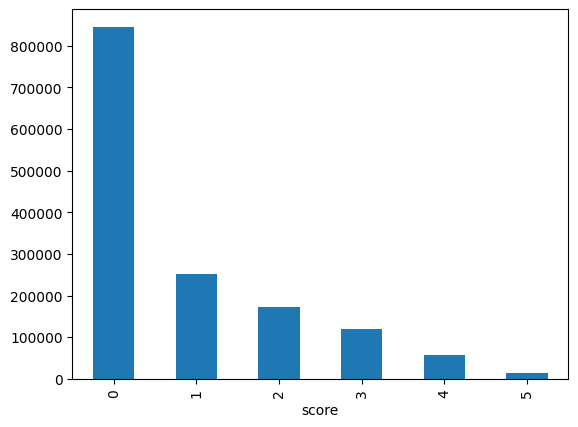

In [ ]:
drought_df['score'].value_counts().plot(kind='bar')

## Statistiques Descriptives

In [ ]:
#Pour les colonnes numériques :
display(drought_df.describe())

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
count,1.460760e+06,1.460760e+06,1.460760e+06,1.460760e+06,1.460760e+06,1.460760e+06,1.460760e+06,1.460760e+06,1.460760e+06,1.460760e+06,...,1.460760e+06,1.460760e+06,1.460760e+06,1.460760e+06,1.460760e+06,1.460760e+06,1.460760e+06,1.460760e+06,1.460760e+06,1.460760e+06
mean,3.067038e+04,2.629302e+00,9.667849e+01,7.756083e+00,1.289528e+01,6.897912e+00,6.933332e+00,1.884290e+01,7.432878e+00,1.141002e+01,...,1.929919e+00,3.278478e+00,5.551236e+00,7.847556e+00,3.133294e+00,4.714265e+00,8.575201e-01,2.004004e+03,6.504255e+00,1.571277e+01
std,1.497911e+04,6.143026e+00,5.451173e+00,4.620030e+00,1.081836e+01,1.000983e+01,9.957411e+00,1.146088e+01,1.045199e+01,4.062727e+00,...,1.334254e+00,1.934872e+00,2.285496e+00,2.813855e+00,2.102445e+00,2.174585e+00,1.227178e+00,2.584732e+00,3.448557e+00,8.799933e+00
min,1.001000e+03,0.000000e+00,6.695000e+01,2.000000e-01,-3.023000e+01,-3.255000e+01,-3.049000e+01,-2.606000e+01,-3.821000e+01,1.600000e-01,...,0.000000e+00,2.600000e-01,5.100000e-01,8.500000e-01,0.000000e+00,4.200000e-01,0.000000e+00,2.000000e+03,1.000000e+00,1.000000e+00
25%,1.904450e+04,1.000000e-02,9.586000e+01,3.760000e+00,4.550000e+00,-1.060000e+00,-1.020000e+00,1.045000e+01,-7.300000e-01,8.520000e+00,...,9.700000e-01,1.820000e+00,3.830000e+00,5.730000e+00,1.460000e+00,3.150000e+00,0.000000e+00,2.002000e+03,4.000000e+00,8.000000e+00
50%,2.921200e+04,2.100000e-01,9.832000e+01,6.850000e+00,1.410000e+01,7.590000e+00,7.600000e+00,2.058000e+01,8.080000e+00,1.139000e+01,...,1.670000e+00,2.830000e+00,5.170000e+00,7.390000e+00,2.780000e+00,4.290000e+00,0.000000e+00,2.004000e+03,7.000000e+00,1.600000e+01
75%,4.600750e+04,2.160000e+00,9.998000e+01,1.122000e+01,2.197000e+01,1.535000e+01,1.536000e+01,2.802000e+01,1.612000e+01,1.430000e+01,...,2.580000e+00,4.270000e+00,6.910000e+00,9.500000e+00,4.420000e+00,5.820000e+00,1.000000e+00,2.006000e+03,1.000000e+01,2.300000e+01
max,5.604300e+04,1.686900e+02,1.037600e+02,2.212000e+01,3.887000e+01,2.687000e+01,2.687000e+01,4.775000e+01,3.214000e+01,3.017000e+01,...,1.423000e+01,1.867000e+01,1.977000e+01,2.553000e+01,1.651000e+01,2.194000e+01,5.000000e+00,2.008000e+03,1.200000e+01,3.100000e+01


In [ ]:
#Pour les colonnes catégoriques :
display(drought_df.describe(include=['object']))

,date
count,1460760
unique,470
top,2000-01-04
freq,3108



Skewness: 
 fips          -0.077367
PRECTOT        4.968258
PS            -2.130964
QV2M           0.543197
T2M           -0.387623
T2MDEW        -0.260779
T2MWET        -0.247185
T2M_MAX       -0.437666
T2M_MIN       -0.316601
T2M_RANGE      0.053933
TS            -0.357500
WS10M          1.075389
WS10M_MAX      0.915171
WS10M_MIN      1.337301
WS10M_RANGE    1.302180
WS50M          0.821970
WS50M_MAX      0.880871
WS50M_MIN      0.823364
WS50M_RANGE    1.223414
score          1.350186
year           0.001961
month         -0.010524
day            0.005872
dtype: float64


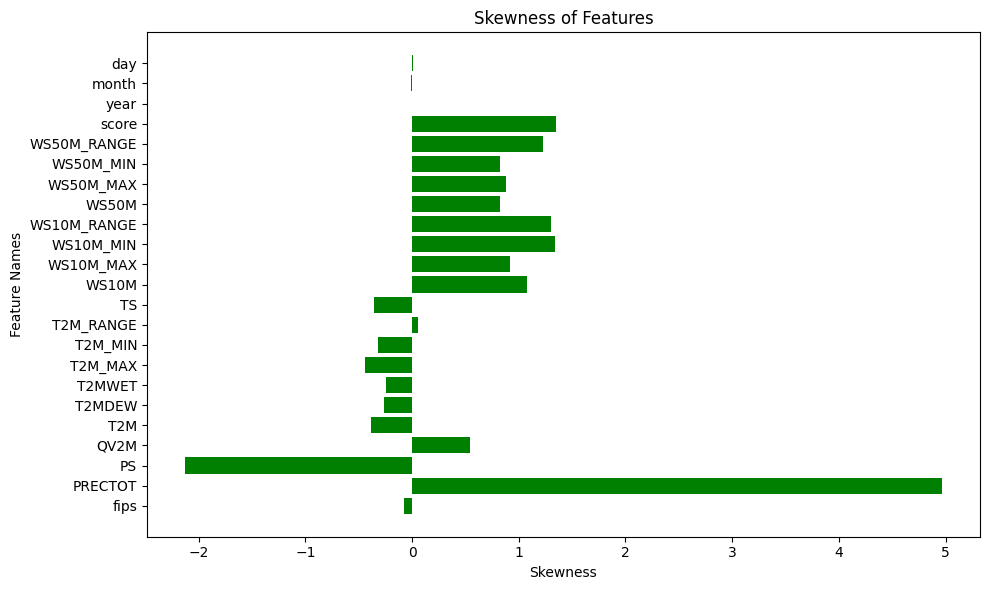

In [ ]:
df_copy = drought_df.drop(columns=['date'])
skewness_result = df_copy.skew(axis=0, skipna=True)
feature_names = skewness_result.index.tolist()
skewness_values = skewness_result.tolist()

print("\nSkewness: \n", skewness_result)

plt.figure(figsize=(10, 6))
plt.barh(feature_names, skewness_values, color='green')
plt.xlabel('Skewness')
plt.ylabel('Feature Names')
plt.title('Skewness of Features')
plt.tight_layout()

plt.show()

Les résultats de la skewness montrent que certaines variables présentent une forte asymétrie, notamment **PRECTOT**, qui a une asymétrie positive élevée, indiquant des valeurs
#extrêmes élevées. À l'inverse, la variable **PS** présente une asymétrie négative, ce qui traduit une concentration des valeurs vers des niveaux élevés avec une longue queue
#vers les petites valeurs. D'autres variables comme **WS10M**, **WS50M** et **score** montrent une asymétrie positive modérée, révélant des valeurs faibles fréquentes et quelques
#valeurs élevées rares. En revanche, des variables telles que **T2M**, **QV2M** et **TS** sont proches de l'équilibre, avec une skewness proche de zéro, ce qui signifie que leurs
#distributions sont relativement symétriques.



Kurtosis: 
 fips           -1.100136
PRECTOT        41.942768
PS              4.803869
QV2M           -0.762451
T2M            -0.641008
T2MDEW         -0.789961
T2MWET         -0.814896
T2M_MAX        -0.569248
T2M_MIN        -0.553117
T2M_RANGE      -0.352479
TS             -0.623743
WS10M           1.252155
WS10M_MAX       0.694509
WS10M_MIN       2.753834
WS10M_RANGE     2.209833
WS50M           0.659870
WS50M_MAX       0.970007
WS50M_MIN       0.438499
WS50M_RANGE     2.319600
score           0.881100
year           -1.232062
month          -1.206192
day            -1.196884
dtype: float64


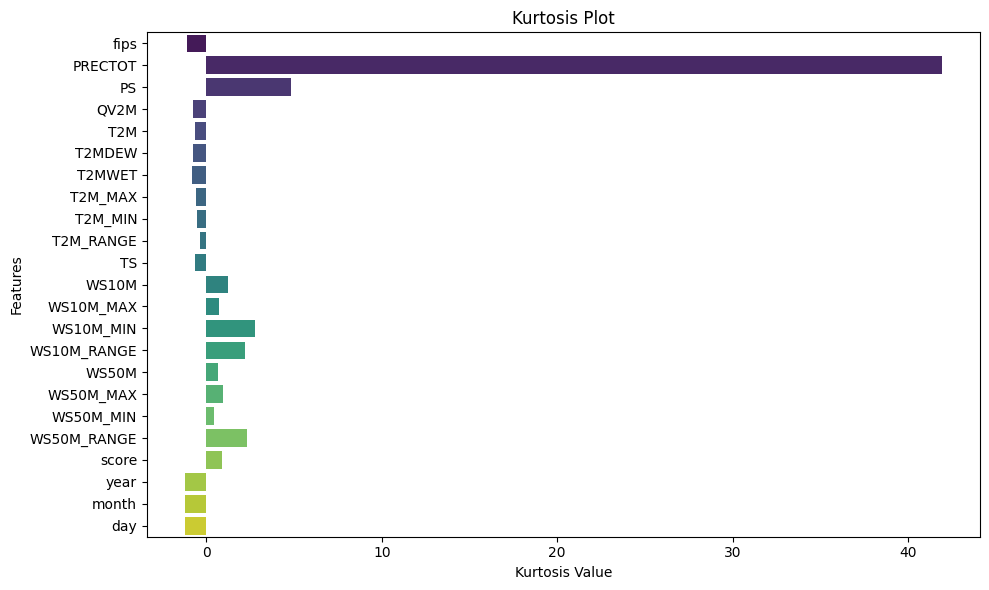

In [ ]:
kurtosis_result = df_copy.kurtosis(axis=0, skipna=True)
feature_names = kurtosis_result.index.tolist()
kurtosis_values = kurtosis_result.tolist()


print("\nKurtosis: \n", kurtosis_result)


plt.figure(figsize=(10, 6))
sns.barplot(x=kurtosis_values, y=feature_names, palette='viridis')
plt.title('Kurtosis Plot')
plt.xlabel('Kurtosis Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

Les résultats de la kurtosis indiquent que certaines variables, comme PRECTOT, présentent une distribution fortement concentrée avec des valeurs extrêmes, tandis que
d'autres, comme T2M et fips, ont des distributions plus plates, suggérant moins de valeurs extrêmes. Les variables avec une kurtosis positive élevée, comme PS, montrent une
concentration autour de certaines valeurs, tandis que celles avec une kurtosis négative, comme T2M, indiquent une distribution plus uniforme

## Analyse univariée

### Distribution des variables continues

In [ ]:
measures_column_list = ['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN',
                        'T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE',
                        'WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']
drought_df_measures = drought_df[measures_column_list]

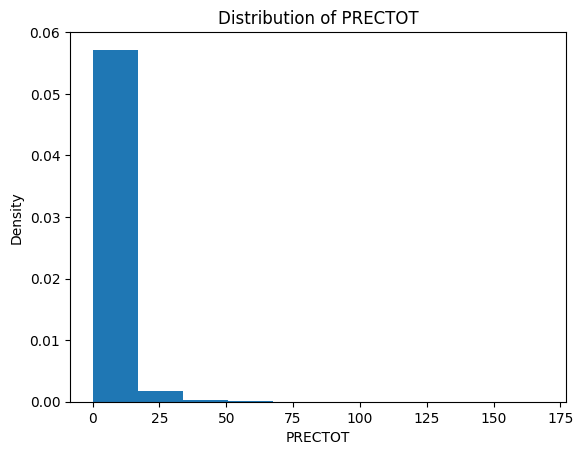

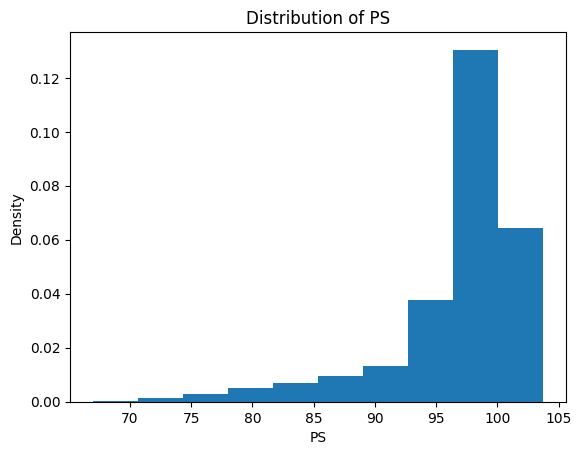

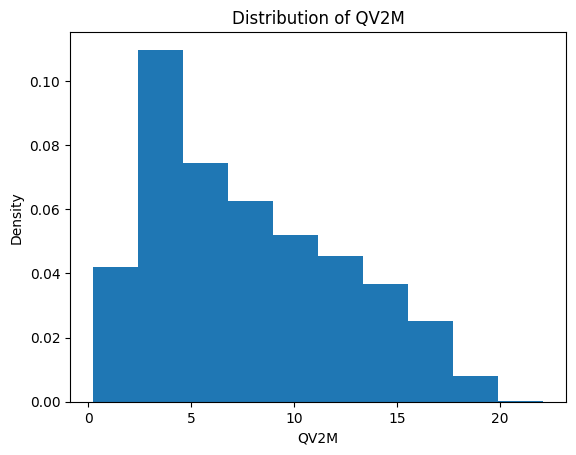

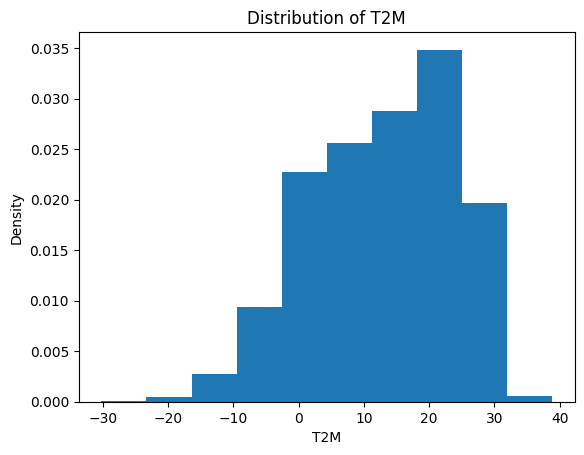

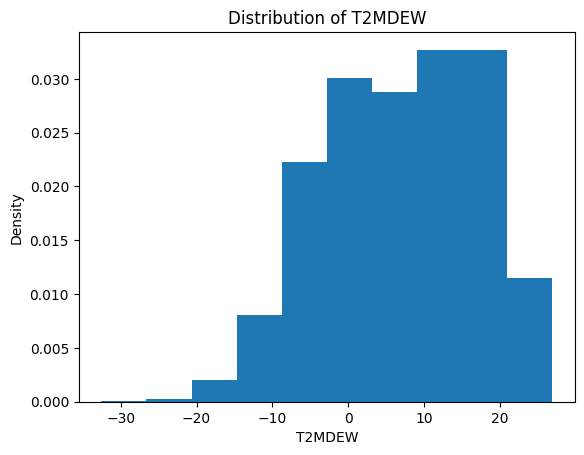

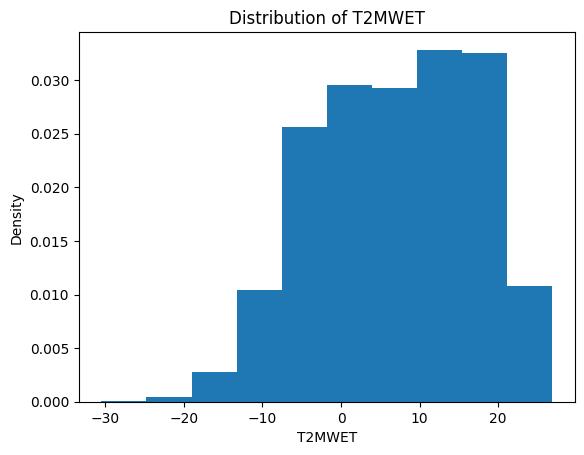

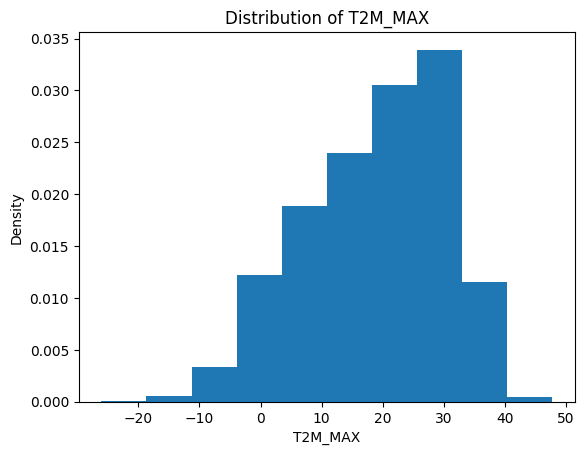

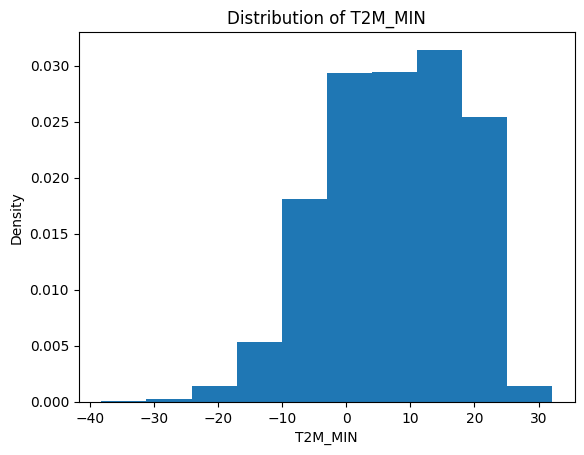

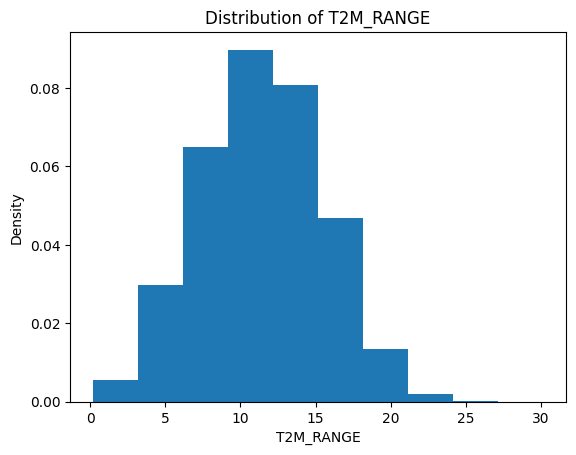

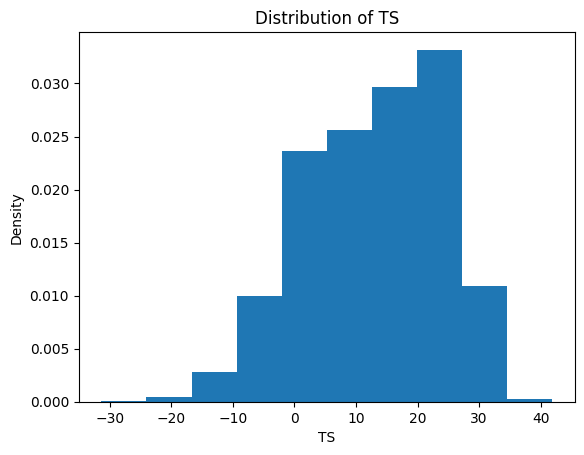

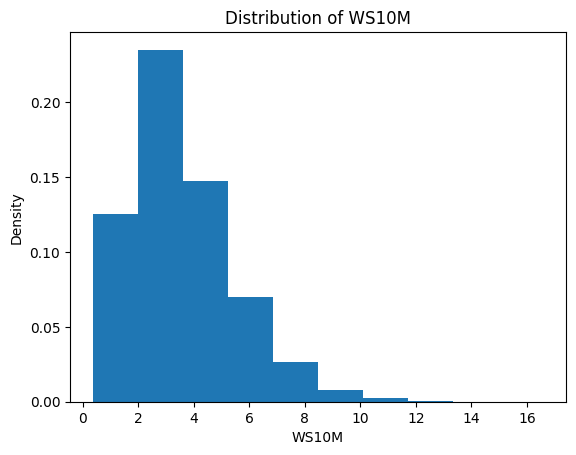

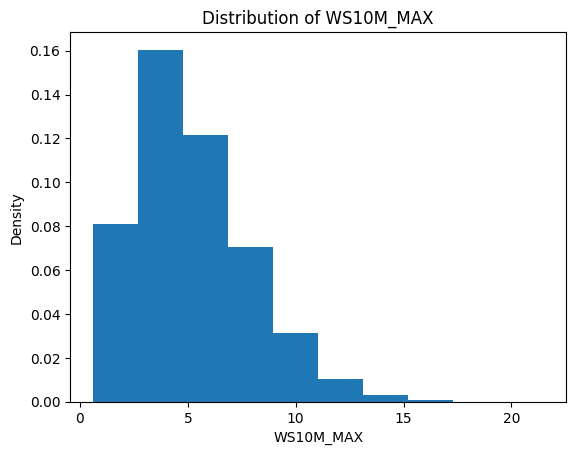

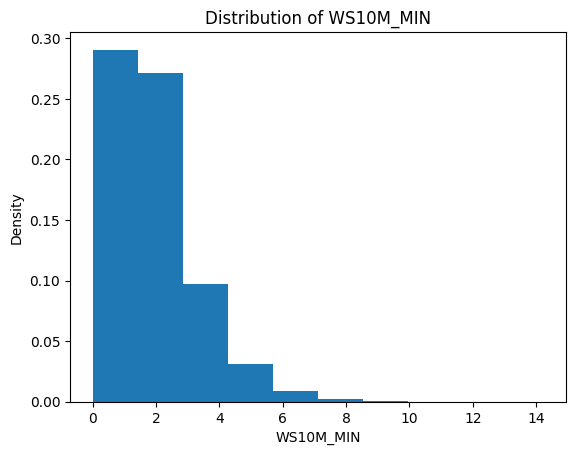

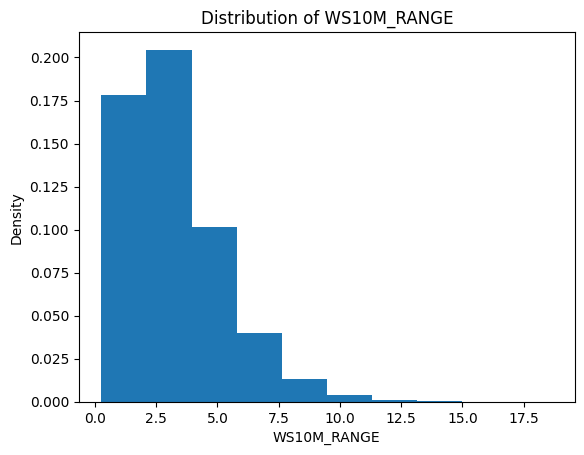

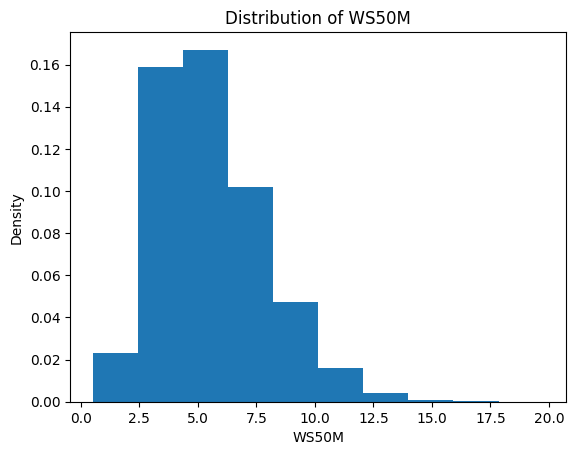

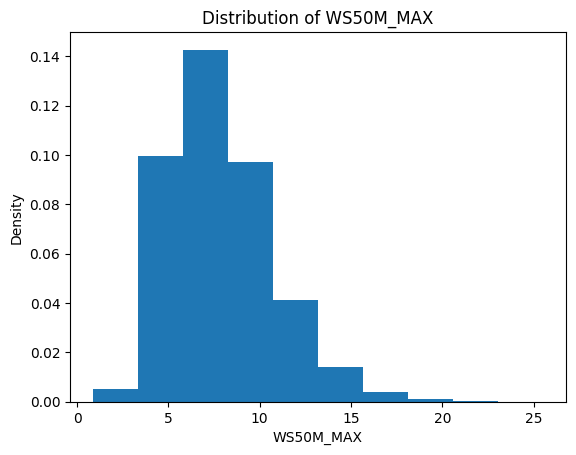

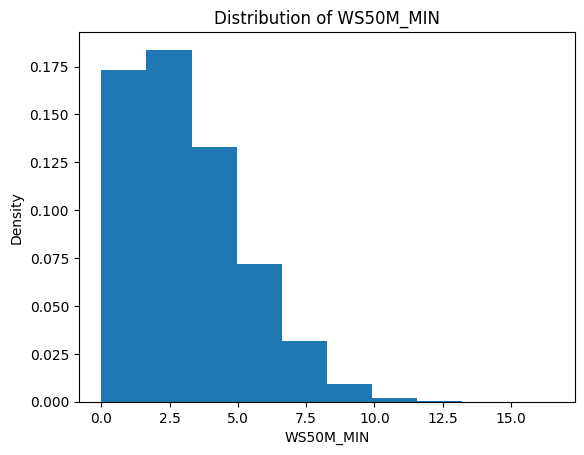

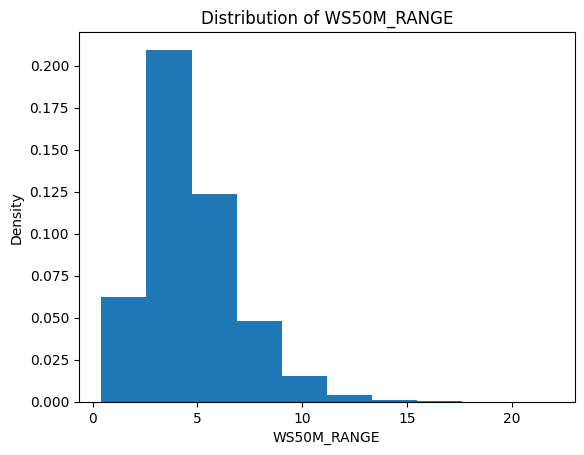

In [ ]:
for col_name in measures_column_list:
    plt.figure()
    plt.hist(drought_df_measures[col_name], density = True)
    x_name = col_name
    plt.xlabel(x_name)
    y_name = 'Density'
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

In [ ]:
print('Total rows = ',len(drought_df_measures.index))
for i in drought_df_measures.select_dtypes(exclude = ['object']).columns:
    print ('Number of values beyong standard outlier limit in ', i)
    print(len(drought_df_measures[(drought_df_measures[i] > drought_df_measures[i].mean() + 3*drought_df_measures[i].std())
            | (drought_df_measures[i] < drought_df_measures[i].mean() - 3*drought_df_measures[i].std())]))

Total rows =  1460760
Number of values beyong standard outlier limit in  PRECTOT
33781
Number of values beyong standard outlier limit in  PS
38744
Number of values beyong standard outlier limit in  QV2M
1
Number of values beyong standard outlier limit in  T2M
1691
Number of values beyong standard outlier limit in  T2MDEW
790
Number of values beyong standard outlier limit in  T2MWET
679
Number of values beyong standard outlier limit in  T2M_MAX
1319
Number of values beyong standard outlier limit in  T2M_MIN
2865
Number of values beyong standard outlier limit in  T2M_RANGE
1691
Number of values beyong standard outlier limit in  TS
1747
Number of values beyong standard outlier limit in  WS10M
15412
Number of values beyong standard outlier limit in  WS10M_MAX
12417
Number of values beyong standard outlier limit in  WS10M_MIN
20539
Number of values beyong standard outlier limit in  WS10M_RANGE
19434
Number of values beyong standard outlier limit in  WS50M
11389
Number of values beyong stand

Les résultats montrent que certaines variables météorologiques comme les précipitations totales (PRECTOT), la pression (PS), et les vitesses
du vent (WS10M, WS50M) présentent un nombre significatif de valeurs aberrantes. Cela pourrait indiquer des phénomènes climatiques extrêmes ou des erreurs dans les données
de mesure. Il peut être nécessaire de traiter ces valeurs aberrantes, soit en les supprimant, soit en les ajustant
pour éviter qu'elles n'affectent l'analyse des données.

In [ ]:
drought_df = drought_df[(drought_df['PRECTOT'] <= drought_df['PRECTOT'].mean() + 3*drought_df['PRECTOT'].std()) &
        (drought_df['PRECTOT'] >= drought_df['PRECTOT'].mean() - 3*drought_df['PRECTOT'].std())]

drought_df = drought_df[(drought_df['PS'] <= drought_df['PS'].mean() + 3*drought_df['PS'].std()) &
        (drought_df['PS'] >= drought_df['PS'].mean() - 3*drought_df['PS'].std())]

drought_df = drought_df[(drought_df['QV2M'] <= drought_df['QV2M'].mean() + 3*drought_df['QV2M'].std()) &
        (drought_df['QV2M'] >= drought_df['QV2M'].mean() - 3*drought_df['QV2M'].std())]

drought_df = drought_df[(drought_df['T2M'] <= drought_df['T2M'].mean() + 3*drought_df['T2M'].std()) &
        (drought_df['T2M'] >= drought_df['T2M'].mean() - 3*drought_df['T2M'].std())]

drought_df = drought_df[(drought_df['T2MDEW'] <= drought_df['T2MDEW'].mean() + 3*drought_df['T2MDEW'].std()) &
        (drought_df['T2MDEW'] >= drought_df['T2MDEW'].mean() - 3*drought_df['T2MDEW'].std())]

drought_df = drought_df[(drought_df['T2MWET'] <= drought_df['T2MWET'].mean() + 3*drought_df['T2MWET'].std()) &
        (drought_df['T2MWET'] >= drought_df['T2MWET'].mean() - 3*drought_df['T2MWET'].std())]

drought_df = drought_df[(drought_df['T2M_MAX'] <= drought_df['T2M_MAX'].mean() + 3*drought_df['T2M_MAX'].std()) &
        (drought_df['T2M_MAX'] >= drought_df['T2M_MAX'].mean() - 3*drought_df['T2M_MAX'].std())]

drought_df = drought_df[(drought_df['T2M_MIN'] <= drought_df['T2M_MIN'].mean() + 3*drought_df['T2M_MIN'].std()) &
        (drought_df['T2M_MIN'] >= drought_df['T2M_MIN'].mean() - 3*drought_df['T2M_MIN'].std())]

drought_df = drought_df[(drought_df['T2M_RANGE'] <= drought_df['T2M_RANGE'].mean() + 3*drought_df['T2M_RANGE'].std()) &
        (drought_df['T2M_RANGE'] >= drought_df['T2M_RANGE'].mean() - 3*drought_df['T2M_RANGE'].std())]

drought_df = drought_df[(drought_df['TS'] <= drought_df['TS'].mean() + 3*drought_df['TS'].std()) &
        (drought_df['TS'] >= drought_df['TS'].mean() - 3*drought_df['TS'].std())]

drought_df = drought_df[(drought_df['WS10M'] <= drought_df['WS10M'].mean() + 3*drought_df['WS10M'].std()) &
        (drought_df['WS10M'] >= drought_df['WS10M'].mean() - 3*drought_df['WS10M'].std())]

drought_df = drought_df[(drought_df['WS10M_MAX'] <= drought_df['WS10M_MAX'].mean() + 3*drought_df['WS10M_MAX'].std()) &
        (drought_df['WS10M_MAX'] >= drought_df['WS10M_MAX'].mean() - 3*drought_df['WS10M_MAX'].std())]

drought_df = drought_df[(drought_df['WS10M_MIN'] <= drought_df['WS10M_MIN'].mean() + 3*drought_df['WS10M_MIN'].std()) &
        (drought_df['WS10M_MIN'] >= drought_df['WS10M_MIN'].mean() - 3*drought_df['WS10M_MIN'].std())]

drought_df = drought_df[(drought_df['WS10M_RANGE'] <= drought_df['WS10M_RANGE'].mean() + 3*drought_df['WS10M_RANGE'].std()) &
        (drought_df['WS10M_RANGE'] >= drought_df['WS10M_RANGE'].mean() - 3*drought_df['WS10M_RANGE'].std())]

drought_df = drought_df[(drought_df['WS50M'] <= drought_df['WS50M'].mean() + 3*drought_df['WS50M'].std()) &
        (drought_df['WS50M'] >= drought_df['WS50M'].mean() - 3*drought_df['WS50M'].std())]

drought_df = drought_df[(drought_df['WS50M_MAX'] <= drought_df['WS50M_MAX'].mean() + 3*drought_df['WS50M_MAX'].std()) &
        (drought_df['WS50M_MAX'] >= drought_df['WS50M_MAX'].mean() - 3*drought_df['WS50M_MAX'].std())]

drought_df = drought_df[(drought_df['WS50M_MIN'] <= drought_df['WS50M_MIN'].mean() + 3*drought_df['WS50M_MIN'].std()) &
        (drought_df['WS50M_MIN'] >= drought_df['WS50M_MIN'].mean() - 3*drought_df['WS50M_MIN'].std())]

drought_df = drought_df[(drought_df['WS50M_RANGE'] <= drought_df['WS50M_RANGE'].mean() + 3*drought_df['WS50M_RANGE'].std()) &
        (drought_df['WS50M_RANGE'] >= drought_df['WS50M_RANGE'].mean() - 3*drought_df['WS50M_RANGE'].std())]

print('Total rows = ',len(drought_df.index))

Total rows =  1315824


## Analyse univariée

## Distribution des variables catégorielles

In [ ]:
categorical_column_list = ['score','year','month','day']
drought_df_categorical = drought_df[['score','year','month','day']]

<Figure size 1000x4000 with 0 Axes>

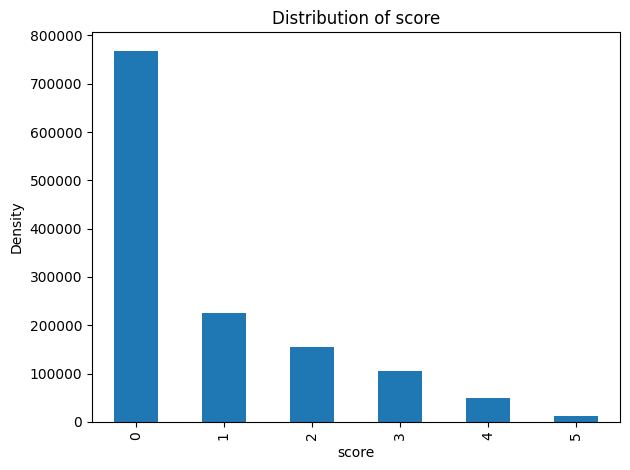

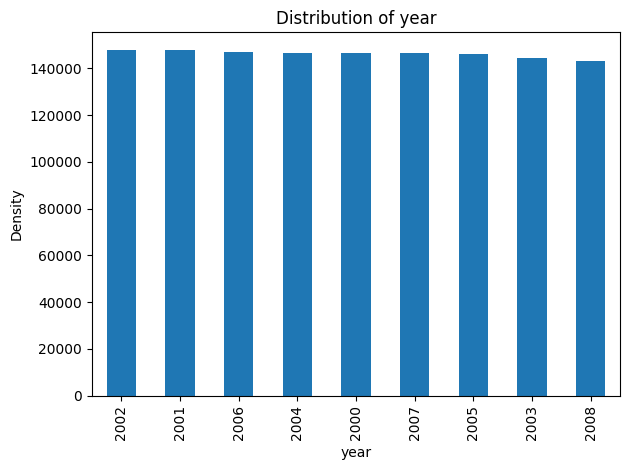

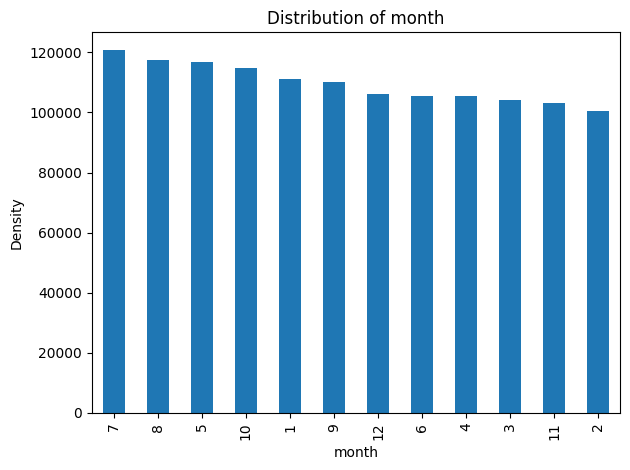

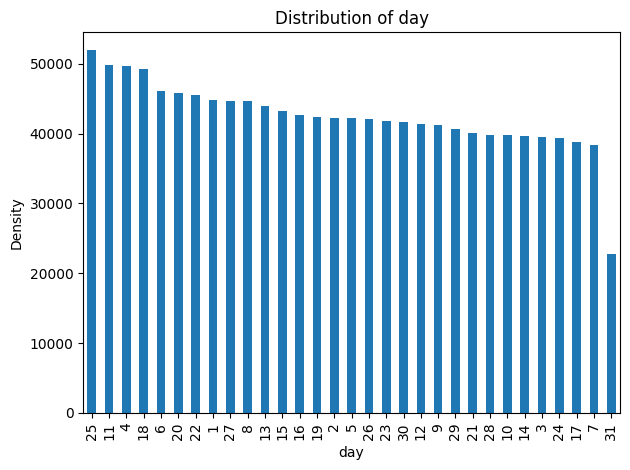

In [ ]:
# Distribution of categorical variables
plt.figure(figsize=(10,40))
for col_name in categorical_column_list:
    plt.figure()
    drought_df_categorical[col_name].value_counts().plot(kind = 'bar')
    x_name = col_name
    y_name = 'Density'
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))
    plt.tight_layout()


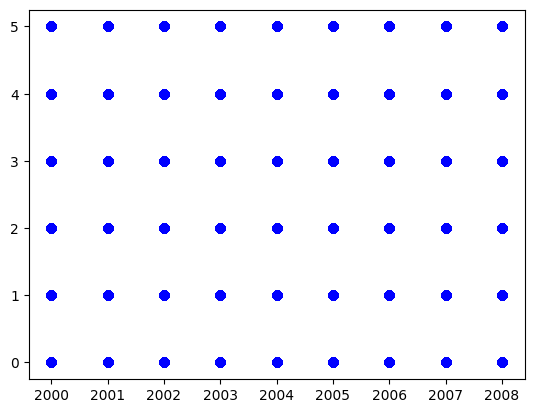

In [ ]:
plt.scatter(drought_df['year'], drought_df['score'], c ="blue")
plt.show()

In [ ]:
correlation_plot = df_copy.corr()
correlation_plot.style.background_gradient(cmap = 'RdYlGn')

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
fips,1.000000,-0.017437,-0.036262,-0.052396,-0.049405,-0.048508,-0.048669,-0.051193,-0.047465,-0.022303,-0.045566,0.048363,0.042573,0.040408,0.029165,0.054043,0.054854,0.041835,0.030535,-0.025014,-0.000000,-0.000000,0.000000
PRECTOT,-0.017437,1.000000,0.064629,0.261675,0.101562,0.242464,0.242476,0.032732,0.154592,-0.305377,0.097805,0.054525,0.062951,0.027190,0.065573,0.073082,0.077667,0.062446,0.040127,-0.066682,0.027351,0.033835,-0.007164
PS,-0.036262,0.064629,1.000000,0.282350,0.163079,0.344899,0.344851,0.110423,0.207152,-0.221429,0.162595,-0.076833,-0.134486,0.027058,-0.198798,-0.037990,-0.088540,0.039679,-0.152928,-0.222945,-0.004523,0.003010,-0.005150
QV2M,-0.052396,0.261675,0.282350,1.000000,0.868731,0.961232,0.962255,0.800453,0.906601,-0.074306,0.861126,-0.208477,-0.241217,-0.091098,-0.260290,-0.192610,-0.240776,-0.066067,-0.247684,-0.044835,0.028499,0.153810,-0.021466
T2M,-0.049405,0.101562,0.163079,0.868731,1.000000,0.910019,0.910724,0.982792,0.980750,0.249310,0.997434,-0.198289,-0.211865,-0.114157,-0.205070,-0.187753,-0.203643,-0.104495,-0.162480,0.071216,0.003327,0.191417,-0.010765
T2MDEW,-0.048508,0.242464,0.344899,0.961232,0.910019,1.000000,0.999971,0.849221,0.937453,-0.016104,0.901732,-0.222120,-0.254485,-0.098306,-0.273090,-0.191396,-0.236428,-0.067558,-0.240615,-0.060243,0.024445,0.165089,-0.012721
T2MWET,-0.048669,0.242476,0.344851,0.962255,0.910724,0.999971,1.000000,0.849932,0.938162,-0.015923,0.902469,-0.221764,-0.254076,-0.098252,-0.272579,-0.191285,-0.236264,-0.067622,-0.240341,-0.059577,0.024435,0.165100,-0.012781
T2M_MAX,-0.051193,0.032732,0.110423,0.800453,0.982792,0.849221,0.849932,1.000000,0.935354,0.414641,0.979351,-0.209540,-0.215586,-0.132319,-0.197530,-0.191924,-0.194482,-0.126796,-0.129065,0.105453,-0.003219,0.186282,-0.010583
T2M_MIN,-0.047465,0.154592,0.207152,0.906601,0.980750,0.937453,0.938162,0.935354,1.000000,0.065961,0.978245,-0.195471,-0.215910,-0.101153,-0.219457,-0.191966,-0.222422,-0.087973,-0.202753,0.042978,0.003069,0.206388,-0.010466
T2M_RANGE,-0.022303,-0.305377,-0.221429,-0.074306,0.249310,-0.016104,-0.015923,0.414641,0.065961,1.000000,0.246045,-0.088228,-0.052701,-0.113036,0.007359,-0.047550,0.023585,-0.131363,0.157522,0.186916,-0.016976,-0.005466,-0.002929


Les variables comme T2M_MAX, T2MDEW, QV2M, et T2MWET sont fortement corrélées entre elles.

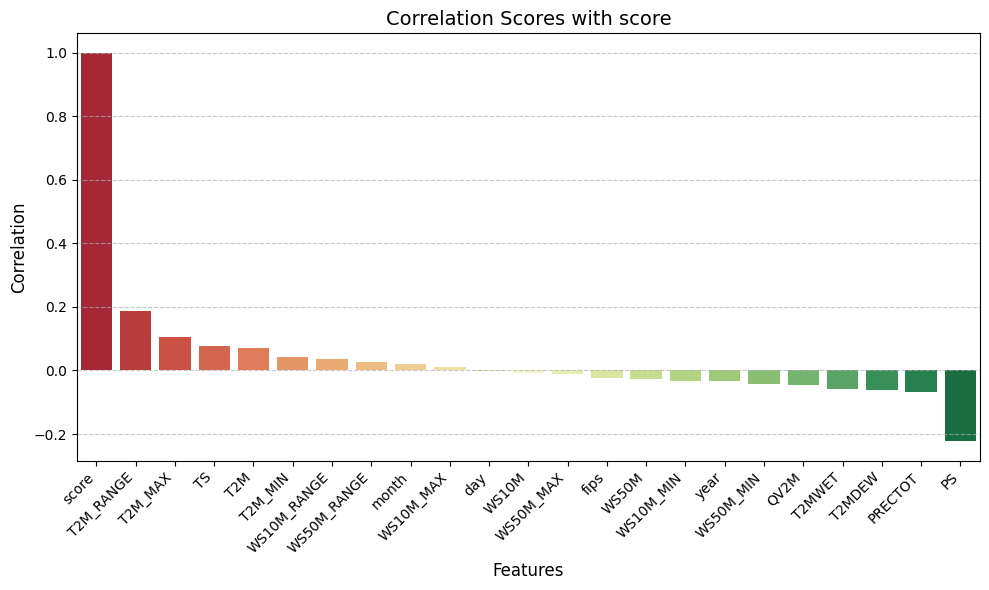

In [ ]:
correlation_scores = df_copy.corr()['score'].sort_values(ascending=False)

# Plot the correlation scores
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_scores.index, y=correlation_scores.values, palette="RdYlGn")
plt.title(f'Correlation Scores with score', fontsize=14)
plt.ylabel('Correlation', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
#L'écart de température (T2M_RANGE) montre la plus forte corrélation positive avec le score, indiquant qu'une amplitude thermique élevée pourrait améliorer les performances.
#En revanche, la pression atmosphérique (PS) présente une corrélation
#négative notable, suggérant que des pressions élevées sont moins favorables au score.

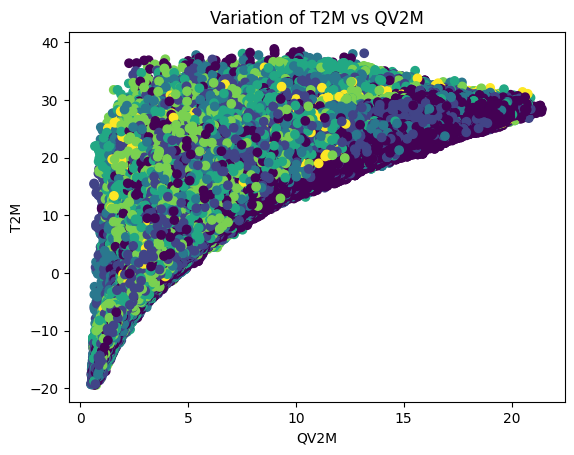

In [ ]:
plt.scatter(drought_df['QV2M'], drought_df['T2M'], c =drought_df['score'])
plt.xlabel('QV2M')
plt.ylabel('T2M')
plt.title('Variation of T2M vs QV2M')
plt.show()

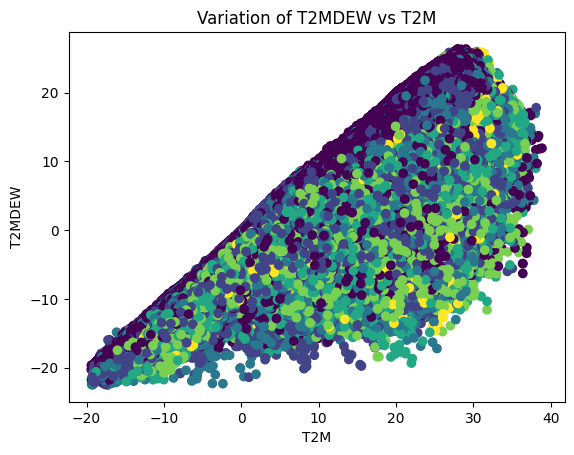

In [ ]:
plt.scatter(drought_df['T2M'], drought_df['T2MDEW'], c =drought_df['score'])
plt.xlabel('T2M')
plt.ylabel('T2MDEW')
plt.title('Variation of T2MDEW vs T2M')
plt.show()

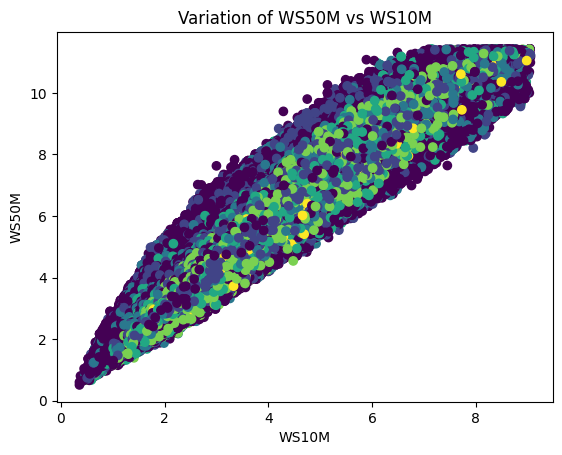

In [ ]:
plt.scatter(drought_df['WS10M'], drought_df['WS50M'], c= drought_df['score'])
plt.xlabel('WS10M')
plt.ylabel('WS50M')
plt.title('Variation of WS50M vs WS10M')
plt.show()